In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('dadosacoes.csv') 
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


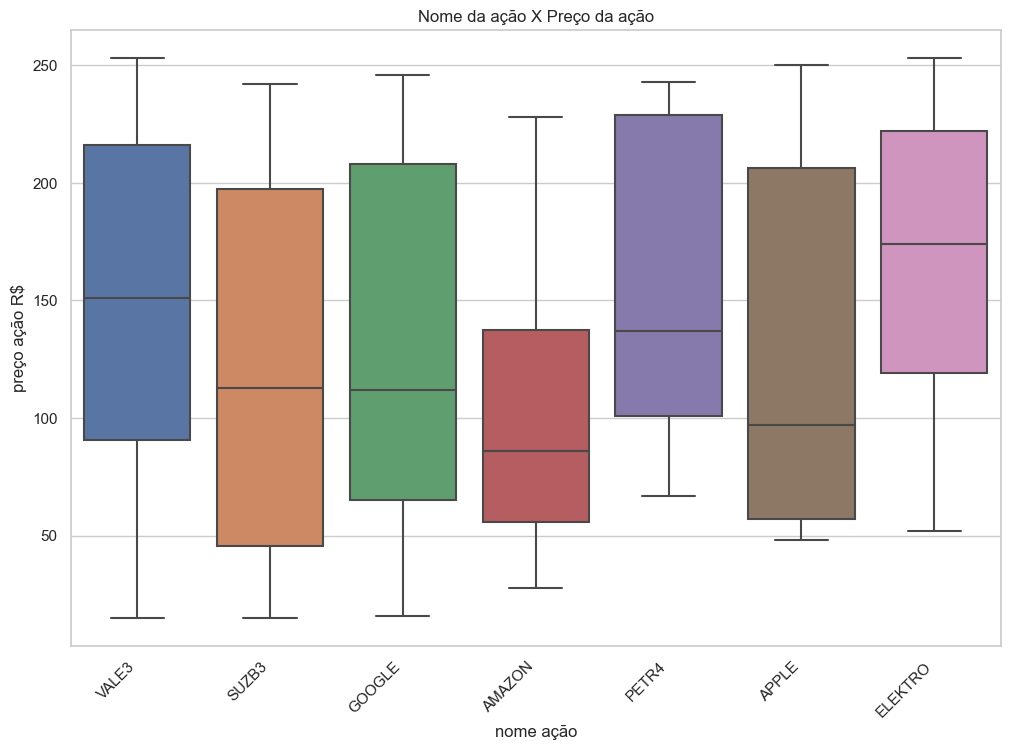

In [12]:
df.info()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8)) 

ax = sns.boxplot(x='nome ação', y='preço ação R$', data=df)
plt.title('Nome da ação X Preço da ação')
plt.xticks(rotation=45, ha='right')  
plt.show()

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
count     100.000000  100.000000                       100.00000
mean      136.140000   52.010000                      2433.70000
std        75.237942   27.475791                      1397.29373
min        15.000000    2.000000                        52.00000
25%        67.000000   28.250000                      1189.25000
50%       121.500000   55.500000                      2433.00000
75%       209.000000   76.500000                      3616.50000
max       253.000000   97.000000                      4993.00000


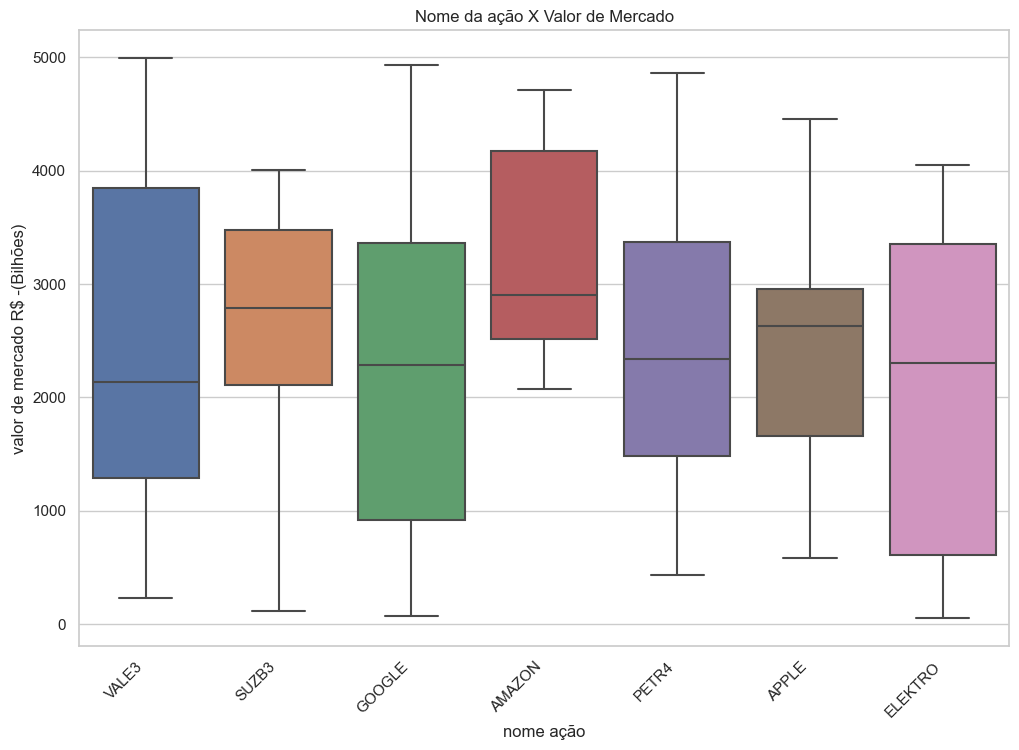

In [13]:
descricao_dados = df.describe()
print(descricao_dados)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8)) 
ax = sns.boxplot(x='nome ação', y='valor de mercado R$ -(Bilhões)', data=df)

plt.title('Nome da ação X Valor de Mercado')
plt.xticks(rotation=45, ha='right')  
plt.show()


In [14]:
df.fillna(df, inplace=True) 
df_encoded = pd.get_dummies(df, columns=['nome ação'], drop_first=True)
df_encoded.head()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,0,0,0,0,0,1
1,91,71,3069,0,0,0,0,1,0
2,165,41,2815,0,0,0,0,1,0
3,56,34,3613,0,0,0,0,1,0
4,212,9,2975,0,0,1,0,0,0


In [16]:
X = df_encoded[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Cluster_4'] = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df_encoded['Cluster_5'] = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=8, random_state=42)
df_encoded['Cluster_8'] = kmeans.fit_predict(X)


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
X = df_encoded[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Cluster_4'] = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=5, random_state=42)
df_encoded['Cluster_5'] = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=8, random_state=42)
df_encoded['Cluster_8'] = kmeans.fit_predict(X)


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


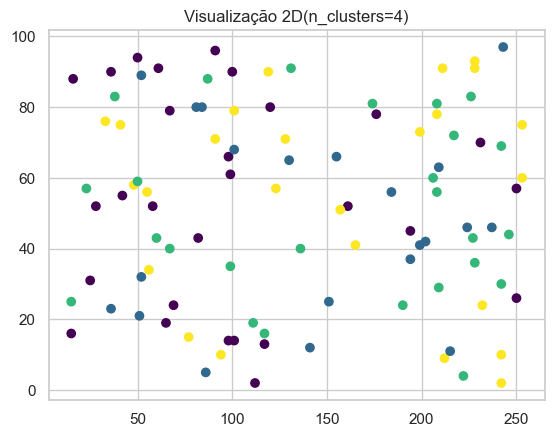

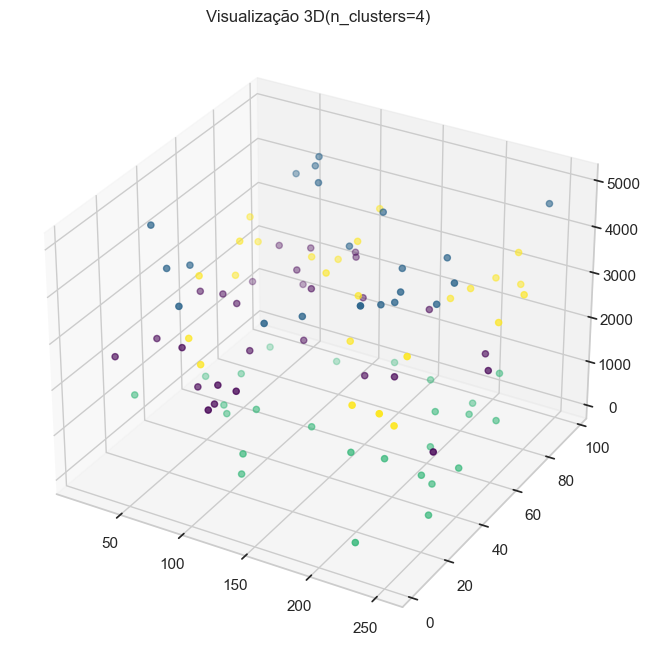

In [23]:
plt.scatter(df_encoded['preço ação R$'], df_encoded['qtde cotas'], c=df_encoded['Cluster_4'], cmap='viridis')
plt.title('Visualização 2D(n_clusters=4)')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encoded['preço ação R$'], df_encoded['qtde cotas'], df_encoded['valor de mercado R$ -(Bilhões)'], c=df_encoded['Cluster_4'], cmap='viridis')
ax.set_title('Visualização 3D(n_clusters=4)')
plt.show()

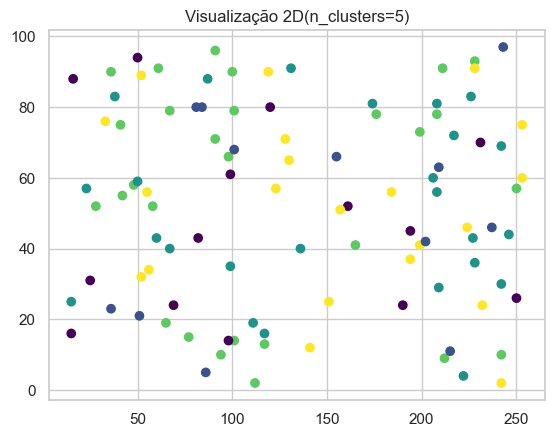

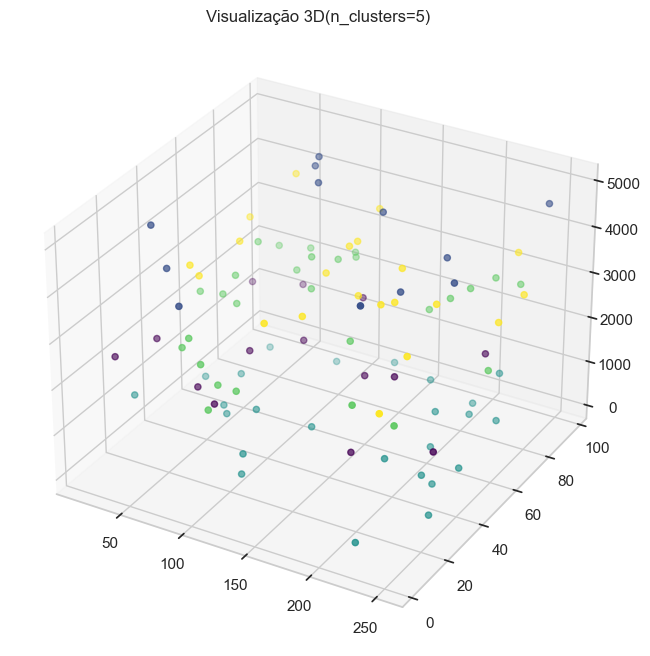

In [20]:
plt.scatter(df_encoded['preço ação R$'], df_encoded['qtde cotas'], c=df_encoded['Cluster_5'], cmap='viridis')
plt.title('Visualização 2D(n_clusters=5)')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encoded['preço ação R$'], df_encoded['qtde cotas'], df_encoded['valor de mercado R$ -(Bilhões)'], c=df_encoded['Cluster_5'], cmap='viridis')
ax.set_title('Visualização 3D(n_clusters=5)')
plt.show()

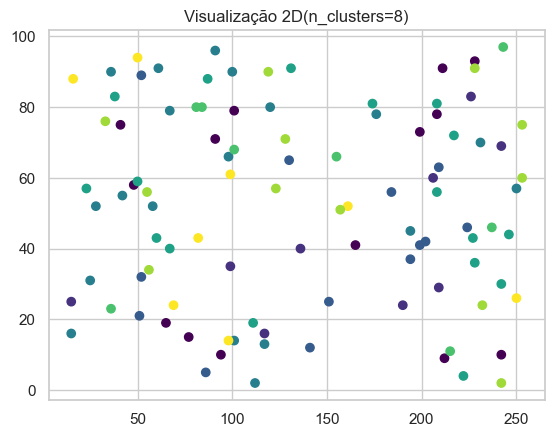

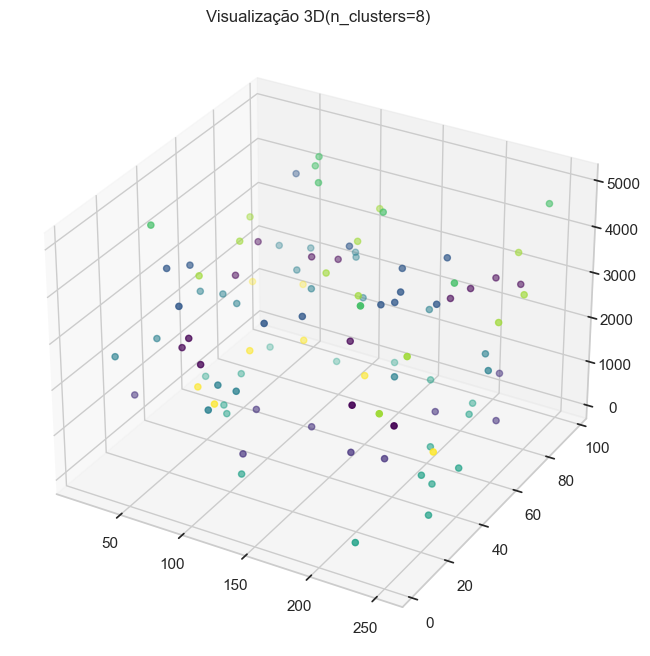

In [21]:
plt.scatter(df_encoded['preço ação R$'], df_encoded['qtde cotas'], c=df_encoded['Cluster_8'], cmap='viridis')
plt.title('Visualização 2D(n_clusters=8)')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encoded['preço ação R$'], df_encoded['qtde cotas'], df_encoded['valor de mercado R$ -(Bilhões)'], c=df_encoded['Cluster_8'], cmap='viridis')
ax.set_title('Visualização 3D(n_clusters=8)')
plt.show()

In [ ]:
# A maior vantagem do aprendizado não supervisionado em comparação com o aprendizado supervisionado é a capacidade de identificar padrões e estruturas nos dados 
# sem a necessidade de rótulos ou supervisão externa. No aprendizado não supervisionado, o algoritmo explora os dados por conta própria, buscando relações intrínsecas, 
# agrupamentos naturais ou características latentes.

# Principais vantagens do aprendizado não supervisionado:

# Descoberta de Padrões Inexplorados:

# O algoritmo pode encontrar padrões e relações nos dados que podem não ser evidentes ou conhecidos a priori. 
# Isso é particularmente útil em conjuntos de dados complexos e grandes.
# Exploração de Características Latentes:

# Permite a identificação de características ou variáveis latentes nos dados, contribuindo para uma compreensão mais profunda do problema.
# Aplicabilidade a Dados Não Rotulados:

# Pode ser utilizado em situações em que os dados não possuem rótulos ou são caros de rotular, 
# o que é comum em muitos cenários do mundo real.
# Adaptação a Mudanças nos Dados:

# É mais flexível e capaz de se adaptar a mudanças nos padrões dos dados ao longo do tempo, 
# sem a necessidade de ajustes constantes nos rótulos supervisionados.
# No entanto, é importante notar que o aprendizado não supervisionado também apresenta desafios, 
# como a interpretabilidade dos resultados e a dificuldade de avaliar o desempenho do modelo sem rótulos para comparação direta. 
# A escolha entre aprendizado supervisionado e não supervisionado dependerá das características específicas do problema em questão e dos objetivos da análise.